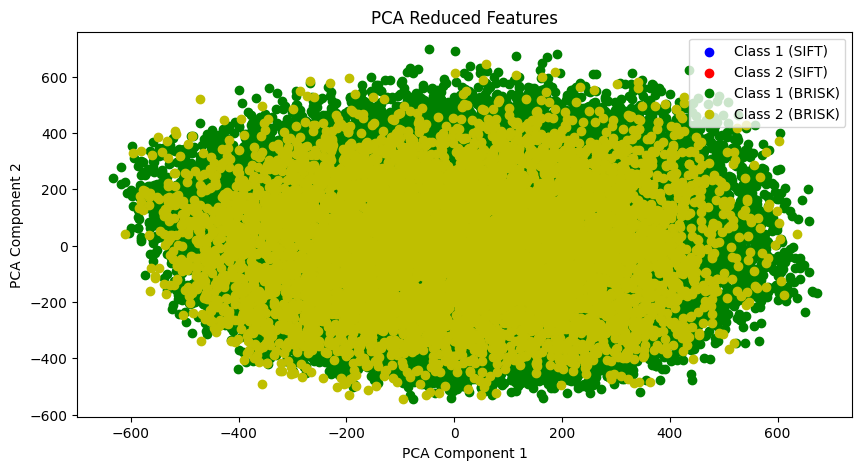

In [1]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to extract SIFT features from images
def extract_sift_features(image_paths):
    sift = cv2.SIFT_create()
    features = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        kp, des = sift.detectAndCompute(image, None)
        if des is not None:
            features.extend(des)  # Extend the list with descriptors
    return features

# Function to extract BRISK features from images
def extract_brisk_features(image_paths):
    brisk = cv2.BRISK_create()
    features = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        kp, des = brisk.detectAndCompute(image, None)
        if des is not None:
            features.extend(des)  # Extend the list with descriptors
    return features

# Define the paths to your image files
class1_folder = r"C:\Users\hp\OneDrive\Desktop\Exam Images\Exam Images\H2\H2Folder1"
class2_folder = r"C:\Users\hp\OneDrive\Desktop\Exam Images\Exam Images\H2\H2Folder2"

# Load grayscale preprocessed images from two classes
class1_image_paths = [os.path.join(class1_folder, filename) for filename in os.listdir(class1_folder)]
class2_image_paths = [os.path.join(class2_folder, filename) for filename in os.listdir(class2_folder)]

# Extract SIFT features from images
class1_sift_features = extract_sift_features(class1_image_paths)
class2_sift_features = extract_sift_features(class2_image_paths)

# Extract BRISK features from images
class1_brisk_features = extract_brisk_features(class1_image_paths)
class2_brisk_features = extract_brisk_features(class2_image_paths)

# Apply K-means clustering to SIFT features
sift_kmeans = KMeans(n_clusters=50, n_init=10)  # Explicitly set n_init to suppress the warning
sift_kmeans.fit(np.vstack(class1_sift_features + class2_sift_features))
sift_clusters = sift_kmeans.labels_

# Apply K-means clustering to BRISK features
brisk_kmeans = KMeans(n_clusters=50, n_init=10)  # Explicitly set n_init to suppress the warning
brisk_kmeans.fit(np.vstack(class1_brisk_features + class2_brisk_features))
brisk_clusters = brisk_kmeans.labels_

# Apply PCA to reduce dimensionality separately for each class
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_class1_sift = pca.fit_transform(np.array(class1_sift_features))
reduced_class2_sift = pca.fit_transform(np.array(class2_sift_features))
reduced_class1_brisk = pca.fit_transform(np.array(class1_+brisk_features))
reduced_class2_brisk = pca.fit_transform(np.array(class2_brisk_features))

# Plot PCA components for SIFT features
plt.figure(figsize=(10, 5))
plt.scatter(reduced_class1_sift[:, 0], reduced_class1_sift[:, 1], label='Class 1 (SIFT)', c='b')
plt.scatter(reduced_class2_sift[:, 0], reduced_class2_sift[:, 1], label='Class 2 (SIFT)', c='r')

# Plot PCA components for BRISK features
plt.scatter(reduced_class1_brisk[:, 0], reduced_class1_brisk[:, 1], label='Class 1 (BRISK)', c='g')
plt.scatter(reduced_class2_brisk[:, 0], reduced_class2_brisk[:, 1], label='Class 2 (BRISK)', c='y')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc="upper right")  # Example legend location
plt.title('PCA Reduced Features')
plt.show()

